In [1]:
from brian2 import *


N = 1000
taum = 10*ms
taupre = 20*ms
taupost = taupre
Ee = 0*mV
vt = -54*mV
vr = -60*mV
El = -74*mV
taue = 5*ms
F = 15*Hz
gmax = .01
dApre = .01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax

eqs_neurons = '''
dv/dt = (ge * (Ee-vr) + El - v) / taum : volt
dge/dt = -ge / taue : 1
'''

input = PoissonGroup(N, rates=F)
neurons = NeuronGroup(1, eqs_neurons, threshold='v>vt', reset='v = vr',
                      method='exact')
S = Synapses(input, neurons,
             '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
             on_pre='''ge += w
                    Apre += dApre
                    w = clip(w + Apost, 0, gmax)''',
             on_post='''Apost += dApost
                     w = clip(w + Apre, 0, gmax)''',
             )
S.connect()
S.w = 'rand() * gmax'
mon = StateMonitor(S, 'w', record=[0, 1])
s_mon = SpikeMonitor(input)

run(100*second, report='text')

subplot(311)
plot(S.w / gmax, '.k')
ylabel('Weight / gmax')
xlabel('Synapse index')
subplot(312)
hist(S.w / gmax, 20)
xlabel('Weight / gmax')
subplot(313)
plot(mon.t/second, mon.w.T/gmax)
xlabel('Time (s)')
ylabel('Weight / gmax')
tight_layout()
show()

Starting simulation at t=0. s for a duration of 100. s
9.243 (9%) simulated in 10s, estimated 1m 38s remaining.
18.4416 (18%) simulated in 20s, estimated 1m 28s remaining.
27.658500000000004 (27%) simulated in 30s, estimated 1m 18s remaining.
36.619 (36%) simulated in 40s, estimated 1m 9s remaining.
45.4896 (45%) simulated in 50s, estimated 1m 0s remaining.
54.551 (54%) simulated in 1m 0s, estimated 50s remaining.
63.902300000000004 (63%) simulated in 1m 10s, estimated 40s remaining.
73.238 (73%) simulated in 1m 20s, estimated 29s remaining.
82.5669 (82%) simulated in 1m 30s, estimated 19s remaining.
91.8138 (91%) simulated in 1m 40s, estimated 9s remaining.
100.0 (100%) simulated in 1m 49s


<Figure size 640x480 with 3 Axes>

In [9]:
S.event_driven

dApre/dt = -Apre/taupre : radian (event-driven)
dApost/dt = -Apost/taupost : radian (event-driven)


In [14]:
print("hello"); print("goodbye")

hello
goodbye


In [17]:
S.post.abstract_code

'_Apre = Apre*exp(-(t - lastupdate)/taupre)\n_Apost = Apost*exp(-(t - lastupdate)/taupost)\nApre = _Apre\nApost = _Apost\nApost += dApost\n                     w = clip(w + Apre, 0, gmax)\nlastupdate = t\n'

In [2]:
from matplotlib.pyplot import *

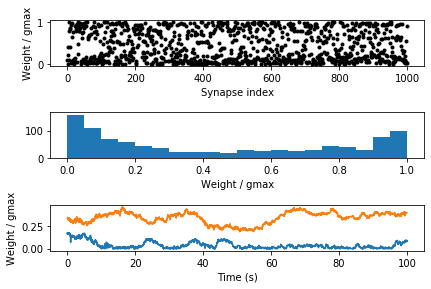

In [3]:
subplot(311)
plot(S.w / gmax, '.k')
ylabel('Weight / gmax')
xlabel('Synapse index')
subplot(312)
hist(S.w / gmax, 20)
xlabel('Weight / gmax')
subplot(313)
plot(mon.t/second, mon.w.T/gmax)
xlabel('Time (s)')
ylabel('Weight / gmax')
tight_layout()
show()